In [37]:
import pandas as pd

import requests
from bs4 import BeautifulSoup as bs

import seaborn as sns
import matplotlib.pyplot as plt

import FEAutils as hlp

In [ ]:
# any inaccuracie should be reported to `REPD.enquiries@beis.gov.uk`

In [29]:
def get_latest_csv_url(
    url: str='https://www.gov.uk/government/publications/renewable-energy-planning-database-monthly-extract'
):
    r = requests.get(url)

    soup = bs(r.text)
    csv_downloads = soup.find_all('strong', text='Download CSV')

    assert len(csv_downloads) == 1
    csv_url = csv_downloads[0].parent['href']
    
    return csv_url

In [30]:
csv_url = get_latest_csv_url()

csv_url

'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1008403/renewable-energy-planning-database-q2-june-2021.csv'

In [28]:
df_repd = pd.read_csv(csv_url, encoding='cp1252')

df_repd.head(3)

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,N00053B,1,07/07/2009,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,NaN,NaN,01/05/2006,01/05/2007,NaN,NaN,NaN,NaN,NaN,NaN
1,AA110,2,20/11/2017,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0730,3,04/06/2020,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,NaN,28/10/2020,01/09/2016,20/12/2019,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# should confirm that the column names match the JSON metadata
# if so (and the data is different) then save the latest csv

In [31]:
df_repd['Technology Type'].value_counts()

Solar Photovoltaics                 2352
Wind Onshore                        2216
Battery                              501
Landfill Gas                         289
Anaerobic Digestion                  267
Biomass (dedicated)                  211
EfW Incineration                     184
Small Hydro                          139
Advanced Conversion Technologies     130
Wind Offshore                         73
Large Hydro                           29
Tidal Barrage and Tidal Stream        27
Sewage Sludge Digestion               12
Pumped Storage Hydroelectricity       10
Shoreline Wave                         8
Biomass (co-firing)                    4
Hot Dry Rocks (HDR)                    2
Liquid Air Energy Storage              2
Flywheels                              1
Fuel Cell (Hydrogen)                   1
Compressed Air Energy Storage          1
Ground Source Heat Pumps               1
Gas Fired CHP                          1
Name: Technology Type, dtype: int64

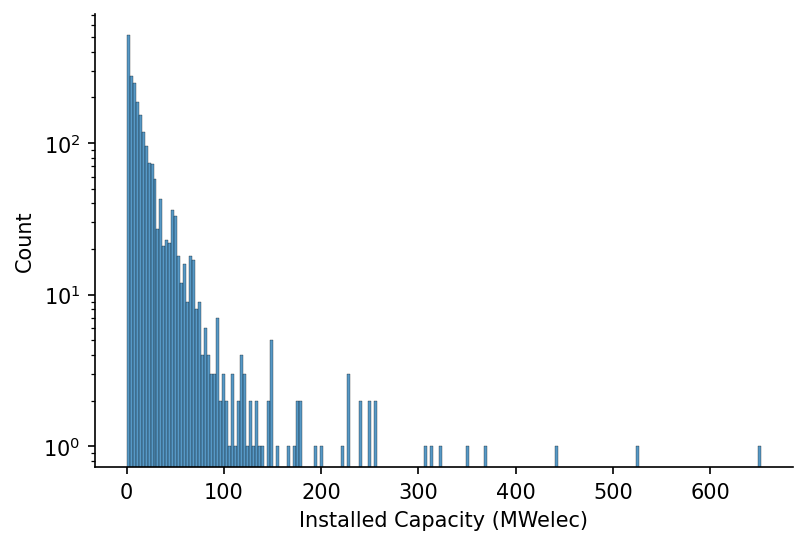

In [41]:
technology_type = 'Wind Onshore'

df_repd_onw = df_repd.query('`Technology Type`==@technology_type')

# Plotting
fig, ax = plt.subplots(dpi=150)

sns.histplot(df_repd_onw['Installed Capacity (MWelec)'], ax=ax)

hlp.hide_spines(ax)
ax.set_yscale('log')

In [ ]:
# plot percentage of sites v total capacity
# how many sites are needed to get to 50% of GB capacity?